# Apresentação:

O objetivo desse código é estudar sobre a Regressão Logística; sua elaboração teórica e sua implementação computacional. Apesar de ter regressão no nome, ela é um modelo de classificação, sendo um dos modelos mais comuns para classificação binária, $y \in \{0,1\}$. Em essência, ela é uma **Generalização dos Modelos Lineares (*GLM - Generalized Linear Model*)**, que nada mais é do que a modelagem linear extendida a distribuições de probabilidade da **família exponencial**. Apesar dela não ser trata como, ela é uma GLM, todavia, por conta desse estudo ser feito sob materiais estudam a Regressão Logística em separado, aqui não me aprofundarei nos conceitos de GLM, falando apenas o superfícial sobre o assunto para entender o modelo.

## Material Base:

Em essência, o material de apoio utilizado no estudo serão **livros** e **notas de aula de disciplinas de estatística da UFRJ**. Sendo eles,

* **An Introduction to Statistical Learning** - *Gareth James*, *Daniele Witten*, *Trevor Hastie*, *Robert Tibishirani* e *Jonathan Taylor* (Em essência os códigos);
* **The Elements of Statistical Learning** - *Trevor Hastie*, *Robert Tibshirani*,*Jerome Friedman*;
* **An Introduction to Generalized Linear Models** - *Annette J. Dobson*, *Adrian G. Barnett*;
* **Notas de Aula do Curso de Inferência** - Disciplina UFRJ;
* **Notas de Aula do Curso de Análise de Regressão** - Disciplina UFRJ.

In [55]:
# Bibliotecas de suporte:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Classes do ISLP (Livro Tibshirani):
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                         summarize, contrast)

# Modelos:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Classes para Auxiliares aos modelos de Statistical Learning:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
# Carregrando dados:
smarket = load_data("Smarket");smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [8]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


note que a variável resposta está como categórica, ou seja, precisamos transformar ela em variável numérica. O que será feito na etapa de pré processamento.

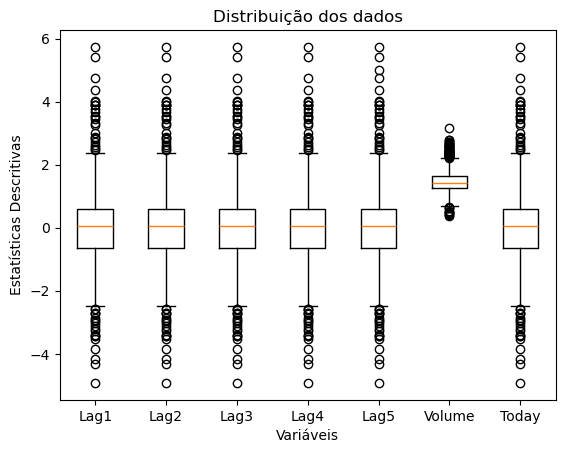

In [31]:
# Separando Colunas Numéricas:
numeric_cols = smarket.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col != "Year"] # Retirando Year para ajuste do Gráfico

# Criando o box plot
plt.boxplot([smarket[col] for col in numeric_cols])
plt.xticks(range(1, len(numeric_cols) + 1), numeric_cols)
plt.title("Distribuição dos dados")
plt.ylabel("Estatísticas Descritivas")
plt.xlabel("Variáveis")
plt.show()

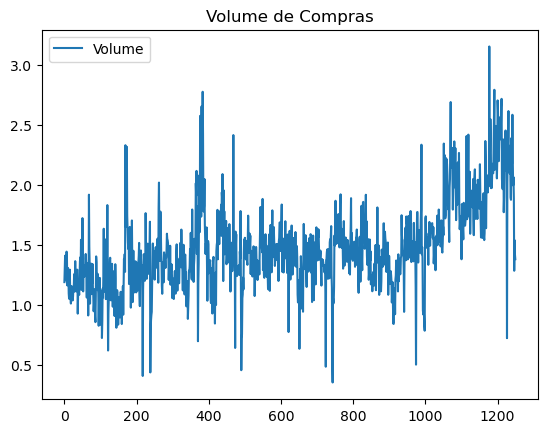

In [49]:
# Volume de Compras:
smarket.plot(y='Volume');
plt.title("Volume de Compras")
plt.show()

In [65]:
smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB


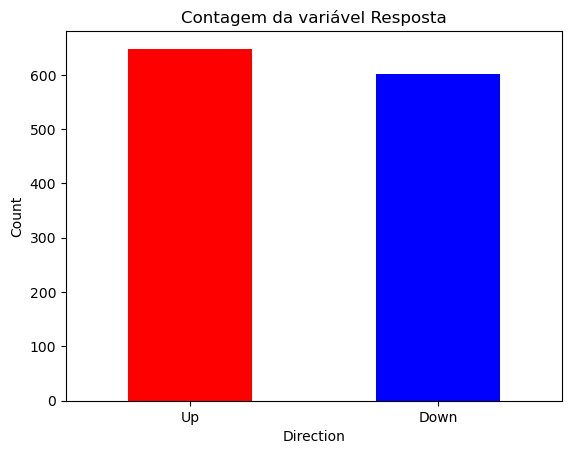

In [152]:
# Respostas:
counts = smarket["Direction"].value_counts()

# Plotando o gráfico de barras
counts.plot(kind='bar', color=["red","blue"])
plt.xlabel('Direction')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Contagem da variável Resposta')
plt.show()

# Pré processamento:

Dado que estamos lidando com um *toy dataset* não há muito o que ser feito corrigido, todavia há uma mudança fundamental que precisa ser feita. Não se faz calculos com *string* e a nosa variável alvo, resposta, está codificada como categórica, ou seja, precisamos codifica-la, transforma-la em número. Para isso, a título de estudo, aqui eu foi realizar o *One Hot Encode* com a API do sklearn e com o Pandas.

In [108]:
# Pré-processando os dados:
X = smarket.drop(['Today', 'Direction', 'Year'],axis=1)
y = smarket['Direction']

Com o `sklearn` saída dessa transformação é uma **matriz**, porém, não precisamos de uma matriz, nossa variável reposta é unidimensional, então pegamos apenas um dos vetores que compõem a saída. Pode ser qualquer um dos vetores, não faz diferença prática.

In [121]:
# Instanciando a Classe:
oneHot = OneHotEncoder(sparse_output=False) # Se True, retorna uma matriz esparsa no formato “Compressed Sparse Row” (CSR).

# Codificando vetor resposta:
ycodificado = one_hot_encoder.fit_transform(y.values.reshape(-1, 1)) # A entrada é uma matriz
yCodificadoSklearn = ycodificado.toarray()[:,1] # Extraindo vetor utíl
yCodificadoSklearn

array([1., 1., 0., ..., 1., 0., 0.])

Com o `Pandas`não é diferente. A maior diferença é que ele devolve um matriz de valores lógicos.

In [123]:
# Fazendo o one-hot encoding
yCodificado = pd.get_dummies(y, prefix='Direction');yCodificado

,Direction_Down,Direction_Up
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True
...,...,...
1245,False,True
1246,True,False
1247,False,True
1248,True,False


In [127]:
# Pegando Vetor útil:
yCodificadoSklearn = yCodificado["Direction_Down"];yCodificadoSklearn.values

array([False, False,  True, ..., False,  True,  True])

Honestamente, acho que existem formas mais fáceis de se implementar isso.

In [134]:
# Realiazando Codificação:
classes = y.unique()
yCodificado = np.array([1 if classes[0] in classe else 0 for classe in y]);yCodificado

array([1, 1, 0, ..., 1, 0, 0])

# Regressão Logística:

Diferentes de modelos como **SVM (*Support Vector Machine*)**, que não são probabilísticos, a **Regressão Logística** tem uma base extreamente probabilistica, inclusive é justamente por isso que ela possui "regressão" no nome, porque ela é, basicamente, uma regressão linear com uma transformação nos ${y}_i$. Na regressão Logística, assim como na regressão linear, queremos modelar $\text{Pr}(Y=k|x=k)$ (o que a torna método **discriminativo**), porem a diferença é que na lógistica, usamos uma transformação nos ${y}_i$ chamada logit (ou logito, em portugues), de modo que,

$$\log\left(\frac{\mu_i}{1-\mu_i}\right) = \textbf{x}_i^T\boldsymbol{\beta}$$

Essa escolha função logit não é ao acaso, dado que essa transformação dos $y_i$, para esse caso em específico, precisa respeita algumas caracteristicas fundamentais que são mais bem exploradas no estudo próprio das **GLM**s, mas que é valido dizer desde já que há esse refinamento dessa escolha. Dito isso, se lembrarmos da regressão linear, queremos estimar o valor médio dado a estrutura predita do modelo, tal que $\mu_i=\hat{y_i}=\textbf{x}^T\boldsymbol{\beta}$, de modo que aqui queremos a mesma coisa, porém para alcançar esse objetivo, precisamos isolar $\mu_i$ de modo que,

$$\mu_i = \frac{e^{\textbf{x}_i^T\boldsymbol{\beta}}}{1+e^{\textbf{x}_i^T\boldsymbol{\beta}}}$$

Note a semelhança com a **função sigmoid**, utilizada em redes neurais. Em essência, uma Regressão Logística pode ser interpretada como uma rede neurais de apenas um neurônio, para classificação binária.Dito isso, pode parecer um processo arduo, mas é um processo que se faz necessário, tendo em vista que uma regressão linear não seria capaz de modelar adequadamente esse processo.

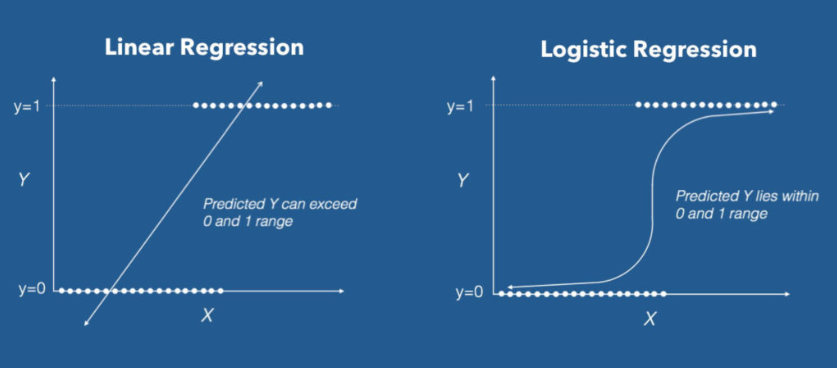

In [144]:
# Separando os dados:
X_train, X_test, y_train, y_test = train_test_split(X.values,yCodificado, test_size=.3, random_state=42) # Aqui, apenas o X era dataframe

## Estimação dos Betas:

Geralmente, na Regressão Logística, o vetor $\hat{\boldsymbol{\beta}}$ é estimado pela **log verossímilhança**, ou, em linguagem de *Machine Learning*, **função score**. Dito isso, aqui há um ponto muito importante, que nem o próprio **The Elements of Statistical Learning** explora muito bem, que porque  $\textbf{y} \sim Bin(\theta,n)$. A ideia é simples, classificação binária, uma únia amostra $y$ ou é $0$ ou é $1$ e uma boa forma de modelar isso é com uma distribuição Bernoulli, de modo que $y \sim Ber(\theta)$, porém, temos um $\textbf{y}=\{y_1,...,y_n\}$, ou seja, $\textbf{y}$ é gerado num **processo estocástico**, de modo que presumesse que os $y_i$ são **independentes e identicamente distribuídos** (iid). Sendo assim, se $y_i \sim Ber(\theta),\ \forall{i} = \{1,2,...,n\}$ e $\textbf{y}=\{y_1,...,y_n\}$, então $\textbf{y} \sim Bin(\theta,n)$. Deste modo,

$$\begin{align*} 
\mathcal{l}(\boldsymbol{\beta}) &= \sum_{i=1}^N\{y_i \log p(x_i;\beta)+(1-y_i)\log(1-p(x_i;\beta))\}\\
&=\sum_{i=1}^N\{y_i\boldsymbol{\beta}^Tx_i-\log(1+e^{\boldsymbol{\beta}^Tx_i})\}
\end{align*}$$

É importante dizer que o $\boldsymbol{beta}$ detem um vetor de $1$'s na sua composição, para justamente indicar o interceptor. Dito isso, é importante dizer que a log verossimilhança das distribuições da família exponencial são **funções convexas**, o que permite usar o **método de Fermat** que aplica **vetor gradiente** para encontrar os **pontos críticos**, de modo que,

$$\frac{\partial{\mathcal{l}}(\boldsymbol{\beta})}{\partial{\boldsymbol{\beta}}} = \sum_{i=1}^N{x_i(y_i - p(x_i;\boldsymbol{\beta}))}=0$$

onde $p+1$, $p$ regressoras mais intercepto, é o numero de equações **não lineares** em $\boldsymbol{\beta}$. A título de custo computacional, é comum se resolver esse otimização pelo **método de Newton-Raphson**, que requer as segundas derivadas, ou a **Matriz Hessiana**, onde,

$$\frac{\partial^2\mathcal{l}(\boldsymbol{\beta})}{\partial{\boldsymbol{\beta}}\partial{\boldsymbol{\beta}^T}} = -\sum_{i=1}^N{x_ix_i^Tp(x_i;\boldsymbol{\beta})(1-p(x_i;\boldsymbol{\beta}))}$$

O **método de Newton-Raphson** é um processo iterativo, de modo que podemos defini-lo como,

$$\boldsymbol{\beta}^{(t+1)}=\boldsymbol{\beta}^{(t)}-\left[\frac{\partial^2\mathcal{l}(\boldsymbol\beta)}{\partial{\boldsymbol{\beta}}\partial{\boldsymbol{\beta}^T}}\right]^{-1}\frac{\partial{\mathcal{l}(\boldsymbol{\beta}})}{\partial{(\boldsymbol{\beta}})}$$

Por padrão, o `sklearn` implementa o `"lbfgs"`, *Limited-memory BFGS*, que é uma versão adapitada do método de Newton-Raphson. Basicamente, o **BFGS de memória limitada** usa uma estimativa da matriz Hessiana inversa para direcionar sua busca através do espaço de variáveis armazena apenas alguns vetores que representam a aproximação implicitamente. O próprio [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) recomenda:

* Para conjuntos de dados pequenos, `"liblinear"` é uma boa escolha, enquanto `"sag"` e `"saga"` são mais rápidos para conjuntos grandes;
* Para problemas multiclasse, apenas`"newton-c"`, `"sag"`, `"saga"` e `"lbfgs"` lidam com perda multinomial;`"liblinear"` e `"newton-cholesky"` só podem lidar com **classificação binária por padrão**. Para aplicar um esquema **um-contra-resto** para o cenário multiclasse, pode-se envolvê-lo com o `OneVsRestClassifier`;
* `"newton-cholesky"` é uma boa escolha para n_amostras >> n_características, especialmente com características **categóricas codificadas em one-hot** com categorias raras. Esteja ciente de que o **uso de memória deste solver tem uma dependência quadrática** em n_características porque ele **calcula explicitamente a matriz Hessiana**.

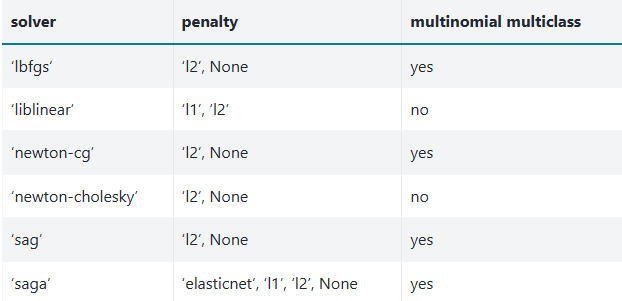

In [146]:
# Crie o modelo de regressão logística usando o solver newton-cg
logReg = LogisticRegression(solver='newton-cg')
logReg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [148]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Resumindo os resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.21      0.30       191
           1       0.50      0.82      0.62       184

    accuracy                           0.51       375
   macro avg       0.52      0.51      0.46       375
weighted avg       0.52      0.51      0.46       375



In [150]:
from sklearn.metrics import log_loss

In [151]:
# Calculando a deviance residual (log loss)
deviance = log_loss(y_test, y_pred)
print("Deviance Residual:", deviance)

Deviance Residual: 17.781535671964463
